In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import os

import cv2
import sys
sys.path.insert(1, '../src')
import app_constants as const

In [4]:
# Create a df consisting of image id and path
xrays_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(const.DATA_DIR, '*','*.png'))}

xrays_df = pd.DataFrame.from_dict(xrays_dict, orient = 'index').reset_index()
xrays_df.columns = ['id', 'path']
labels = xrays_df.id.str.split('-').str[0]
xrays_df['label'] = labels
xrays_df["category"] = xrays_df["label"].map(const.CATEGORY.get) 
print(xrays_df.shape)

(15153, 4)


In [5]:
# Resize all images to 75x75
xrays_df['image'] = xrays_df['path'].map(lambda x: np.asarray(Image.open(x).resize((const.IMAGE_SIZE,const.IMAGE_SIZE))))

In [6]:
xrays_df.head()

,id,path,label,category,image
0,Viral Pneumonia-770,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[[126, 126, 126], [128, 128, 128], [122, 122,..."
1,Viral Pneumonia-1186,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[1, 13, 34, 55, 76, 97, 101, 105, 138, 152, 1..."
2,Viral Pneumonia-1192,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[99, 88, 137, 74, 65, 68, 77, 76, 67, 49, 31,..."
3,Viral Pneumonia-764,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[[83, 83, 83], [88, 88, 88], [93, 93, 93], [9..."
4,Viral Pneumonia-994,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[26, 24, 21, 51, 33, 21, 21, 21, 20, 19, 19, ..."


<AxesSubplot:>

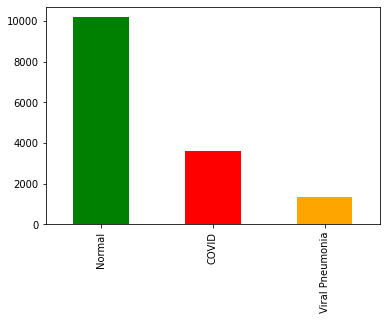

In [7]:
xrays_df['label'].value_counts().plot.bar(color=["green","red", "orange"])

<Figure size 432x288 with 0 Axes>

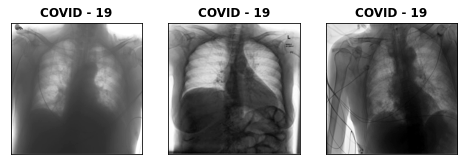

In [8]:
plt.figure()
fig = plt.figure(figsize=(8, 8))
count = 0
for img in os.listdir(const.COVID_DIR):
    if count < const.NUM_CATEGORY:
        img_path = os.path.join(const.COVID_DIR,img)
        img_arr = plt.imread(img_path)
        ax = fig.add_subplot(1, 3, count+1)
        ax.set_title('COVID - 19',fontsize = 12,weight = 'bold')
        ax.set_xticks([])
        ax.set_yticks([])
        # plt.imshow(img_gray_mode)
        plt.imshow(img_arr, cmap=plt.cm.binary)
    else:
        break

    count = count + 1

Viral Pneumonia-770.png


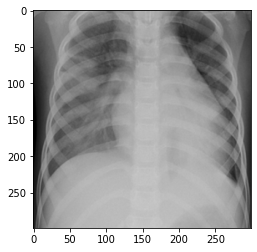

In [9]:
for img in os.listdir(const.PNEUMONIA_DIR):
    img_path = os.path.join(const.PNEUMONIA_DIR,img)
    print(img)
    img_arr = plt.imread(img_path)
    plt.imshow(img_arr)
    break

<Figure size 432x288 with 0 Axes>

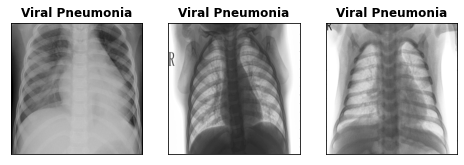

In [10]:
plt.figure()
fig = plt.figure(figsize=(8, 8))
count = 0
for img in os.listdir(const.PNEUMONIA_DIR):
    if count < const.NUM_CATEGORY:
        img_path = os.path.join(const.PNEUMONIA_DIR,img)
        img_arr = plt.imread(img_path)
        ax = fig.add_subplot(1, 3, count+1)
        ax.set_title('Viral Pneumonia',fontsize = 12,weight = 'bold')
        ax.set_xticks([])
        ax.set_yticks([])
        # plt.imshow(img_gray_mode)
        plt.imshow(img_arr, cmap=plt.cm.binary)
    else:
        break

    count = count + 1

<Figure size 432x288 with 0 Axes>

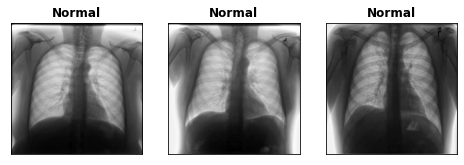

In [11]:

plt.figure()
fig = plt.figure(figsize=(8, 8))
count = 0
for img in os.listdir(const.NORMAL_DIR):
    if count < const.NUM_CATEGORY:
        img_path = os.path.join(const.NORMAL_DIR,img)
        img_arr = plt.imread(img_path)
        ax = fig.add_subplot(1, 3, count+1)
        ax.set_title('Normal',fontsize = 12,weight = 'bold')
        ax.set_xticks([])
        ax.set_yticks([])
        # plt.imshow(img_gray_mode)
        plt.imshow(img_arr, cmap=plt.cm.binary)
    else:
        break

    count = count + 1

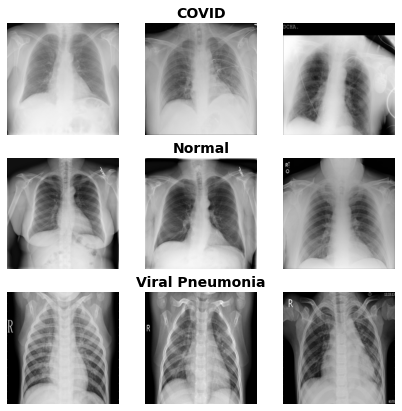

In [12]:

fig, m_axs = plt.subplots(const.NUM_CATEGORY, const.NUM_CATEGORY, figsize = (7, 7))

for n_axs, (type_name, type_rows) in zip(m_axs,xrays_df.sort_values(['label']).groupby('label')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(const.NUM_CATEGORY, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [13]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []
xray_count = xrays_df.shape[0]
for i in range(0,xray_count):
    mean_val.append(xrays_df['image'][i].mean())
    std_dev_val.append(np.std(xrays_df['image'][i]))
    max_val.append(xrays_df['image'][i].max())
    min_val.append(xrays_df['image'][i].min())

xrays_df['mean'] = mean_val
xrays_df['std'] = std_dev_val
xrays_df['max'] = max_val
xrays_df['min'] = min_val

# xrays_df['mean_diff'] = xrays_df['mean'].mean() - xrays_df['mean']

In [14]:
xrays_df.head()

,id,path,label,category,image,mean,std,max,min
0,Viral Pneumonia-770,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[[126, 126, 126], [128, 128, 128], [122, 122,...",139.378133,42.677254,198,0
1,Viral Pneumonia-1186,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[1, 13, 34, 55, 76, 97, 101, 105, 138, 152, 1...",121.624356,66.737577,214,0
2,Viral Pneumonia-1192,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[99, 88, 137, 74, 65, 68, 77, 76, 67, 49, 31,...",92.927111,53.473775,185,0
3,Viral Pneumonia-764,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[[83, 83, 83], [88, 88, 88], [93, 93, 93], [9...",130.471822,54.357977,201,0
4,Viral Pneumonia-994,../data/chest_xrays/Viral Pneumonia/Viral Pneu...,Viral Pneumonia,1,"[[26, 24, 21, 51, 33, 21, 21, 21, 20, 19, 19, ...",131.084800,53.722541,203,1
